In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#scaling initialization
scaler = StandardScaler()

In [3]:
#reading data from the drive
df = pd.read_csv("/content/drive/MyDrive/Datasets-20241201T040656Z-001/Datasets/survey lung cancer .csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df["GENDER"] = df["GENDER"].replace({"M": 1, "F": 0})

<ipython-input-4-3da86514f291>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["GENDER"] = df["GENDER"].replace({"M": 1, "F": 0})


In [5]:
df["LUNG_CANCER"] = df["LUNG_CANCER"].replace({"YES": 1, "NO": 0})

<ipython-input-5-8863c7bdc6de>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["LUNG_CANCER"] = df["LUNG_CANCER"].replace({"YES": 1, "NO": 0})


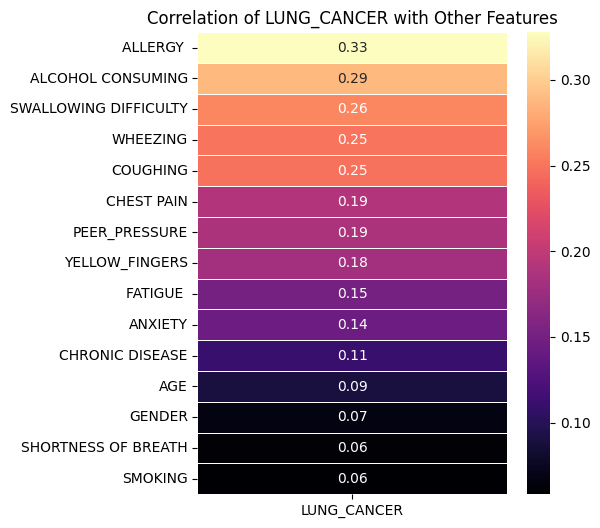

In [6]:
target = 'LUNG_CANCER'
corr_values = df.corr(numeric_only=True)[target].drop(target)
corr_df = corr_values.to_frame().sort_values(by=target, ascending=False)

plt.figure(figsize=(5, 6))
sns.heatmap(corr_df, annot=True, cmap='magma', fmt=".2f", linewidths=0.5, cbar=True)

plt.title(f'Correlation of {target} with Other Features')
plt.show()

In [7]:
to_drop = ["SMOKING","SHORTNESS OF BREATH", "GENDER", "AGE"]
df.drop(to_drop, axis=1, inplace=True)

In [8]:
#Y has Life expectancy while has all other nessary features excluding Life Expectancy
X = df.drop("LUNG_CANCER", axis=1)
X.values.reshape(-1, 1)
Y = df['LUNG_CANCER']

In [9]:
#splitting the data into traning and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 42)

In [10]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN Classifier

In [12]:
def calc_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [13]:
def get_nearest_neighbors(train_data, train_labels, test_sample, k):
    dists = [calc_distance(test_sample, sample) for sample in train_data]
    sorted_idx = np.argsort(dists)
    return np.array(train_labels)[sorted_idx[:k]].flatten()

In [14]:
def knn_classify(train_data, train_labels, test_data, k):
    predictions = np.zeros(test_data.shape[0], dtype=int)
    for i, sample in enumerate(test_data):
        neighbors = get_nearest_neighbors(train_data, train_labels, sample, k)
        mode_result = mode(neighbors, keepdims=True)
        predictions[i] = mode_result.mode[0] if mode_result.mode.size > 0 else neighbors[0]
    return predictions

In [15]:
K = 2

In [16]:
Y_pred = knn_classify(X_train, Y_train, X_test, K)

In [17]:
# Classification Evaluation Metrics
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.912621359223301
Classification Report:
               precision    recall  f1-score   support

           0       0.44      1.00      0.61         7
           1       1.00      0.91      0.95        96

    accuracy                           0.91       103
   macro avg       0.72      0.95      0.78       103
weighted avg       0.96      0.91      0.93       103



In [18]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 7  0]
 [ 9 87]]


In [19]:
report = classification_report(Y_test, Y_pred)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.44      1.00      0.61         7
           1       1.00      0.91      0.95        96

    accuracy                           0.91       103
   macro avg       0.72      0.95      0.78       103
weighted avg       0.96      0.91      0.93       103



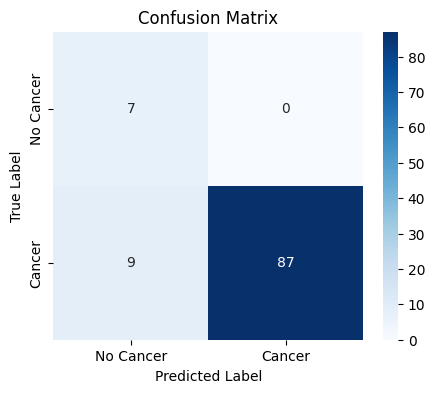

In [20]:
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [21]:
# Define range of K values to test
k_values = range(1, 21)
best_k = None

In [22]:
for k in k_values:
    # Initialize and train the model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)

    # Make predictions
    Y_pred = knn.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy for K={k}: {accuracy}")

    if best_k is None or accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

Accuracy for K=1: 0.941747572815534
Accuracy for K=2: 0.912621359223301
Accuracy for K=3: 0.9514563106796117
Accuracy for K=4: 0.8932038834951457
Accuracy for K=5: 0.941747572815534
Accuracy for K=6: 0.941747572815534
Accuracy for K=7: 0.970873786407767
Accuracy for K=8: 0.970873786407767
Accuracy for K=9: 0.970873786407767
Accuracy for K=10: 0.970873786407767
Accuracy for K=11: 0.9611650485436893
Accuracy for K=12: 0.9514563106796117
Accuracy for K=13: 0.9514563106796117
Accuracy for K=14: 0.9514563106796117
Accuracy for K=15: 0.9514563106796117
Accuracy for K=16: 0.9514563106796117
Accuracy for K=17: 0.9514563106796117
Accuracy for K=18: 0.941747572815534
Accuracy for K=19: 0.9514563106796117
Accuracy for K=20: 0.9514563106796117


In [23]:
# Print best K value
print("\nBest Hyperparameter:")
print(f"Optimal K: {best_k}, With an accuracy of: {best_accuracy:.4f}")


Best Hyperparameter:
Optimal K: 7, With an accuracy of: 0.9709


In [24]:
# Final model with best hyperparameters
Y_pred_best = knn_classify(X_train, Y_train, X_test, best_k)

In [26]:
# Classification Evaluation Metrics
accuracy = accuracy_score(Y_test, Y_pred_best)
print("Accuracy:", accuracy)

Accuracy: 0.970873786407767


In [27]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_best)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 6  1]
 [ 2 94]]


In [28]:
report = classification_report(Y_test, Y_pred_best)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.99      0.98      0.98        96

    accuracy                           0.97       103
   macro avg       0.87      0.92      0.89       103
weighted avg       0.97      0.97      0.97       103



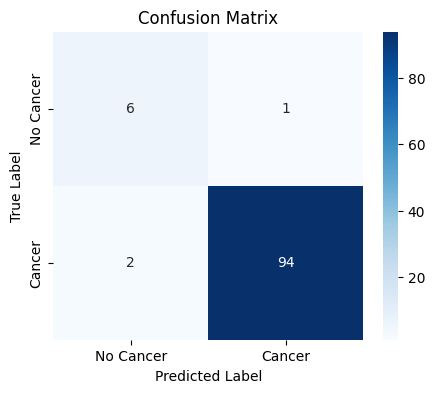

In [29]:
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Sigmoid Classification

In [30]:
def activation_function(z):
    return 1 / (1 + np.exp(-z))

In [31]:
def loss_function(features, labels, weights, bias):
    num_samples = len(labels)
    z = np.dot(features, weights) + bias
    predictions = activation_function(z)
    predictions = np.clip(predictions, 1e-10, 1 - 1e-10)  # Avoid log(0)
    return -np.mean(labels * np.log(predictions) + (1 - labels) * np.log(1 - predictions))

In [32]:
def compute_gradients(features, labels, weights, bias):
    num_samples = len(labels)
    z = np.dot(features, weights) + bias
    predictions = activation_function(z)
    gradient_weights = np.dot(features.T, (predictions - labels)) / num_samples
    gradient_bias = np.mean(predictions - labels)
    return gradient_weights, gradient_bias

In [33]:
def optimize_weights(features, labels, learning_rate=0.01, iterations=1000):
    weights = np.zeros(features.shape[1])
    bias = 0.0
    cost_progress = []

    for i in range(iterations):
        gradient_weights, gradient_bias = compute_gradients(features, labels, weights, bias)
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        cost = loss_function(features, labels, weights, bias)
        cost_progress.append(cost)

    return weights, bias, cost_progress

In [34]:
def make_predictions(features, weights, bias):
    predictions = activation_function(np.dot(features, weights) + bias)
    return [1 if p >= 0.5 else 0 for p in predictions]

In [35]:
weights, bias, cost_history = optimize_weights(X_train, Y_train, learning_rate=0.01, iterations=1000)

In [36]:
Y_pred = make_predictions(X_test, weights, bias)

In [37]:
accuracy = accuracy_score(Y_test, Y_pred)

In [38]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.9514563106796117
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.98      0.97      0.97        96

    accuracy                           0.95       103
   macro avg       0.80      0.84      0.82       103
weighted avg       0.95      0.95      0.95       103



In [39]:
alpha_values = [0.001, 0.01,0.2,0.3, 0.1, 0.5]  # Learning rates
iteration_values = [1000, 2000, 3000, 4000, 5000, 6000]  # Number of iterations

In [40]:
best_alpha = None
best_iterations = None


In [41]:
for alpha in alpha_values:
    for iterations in iteration_values:
        W, b, cost_history = optimize_weights(X_train, Y_train, alpha, iterations)
        # Make predictions
        Y_pred = make_predictions(X_test, W, b)
        accuracy = accuracy_score(Y_test, Y_pred)

        print(f"Alpha: {alpha}, Iterations: {iterations}, Accuracy: {accuracy}")

        if best_alpha is None or accuracy > best_accuracy:
            best_alpha = alpha
            best_iterations = iterations
            best_accuracy = accuracy

Alpha: 0.001, Iterations: 1000, Accuracy: 0.9514563106796117
Alpha: 0.001, Iterations: 2000, Accuracy: 0.9514563106796117
Alpha: 0.001, Iterations: 3000, Accuracy: 0.9514563106796117
Alpha: 0.001, Iterations: 4000, Accuracy: 0.9514563106796117
Alpha: 0.001, Iterations: 5000, Accuracy: 0.9514563106796117
Alpha: 0.001, Iterations: 6000, Accuracy: 0.9514563106796117
Alpha: 0.01, Iterations: 1000, Accuracy: 0.9514563106796117
Alpha: 0.01, Iterations: 2000, Accuracy: 0.9514563106796117
Alpha: 0.01, Iterations: 3000, Accuracy: 0.9514563106796117
Alpha: 0.01, Iterations: 4000, Accuracy: 0.9514563106796117
Alpha: 0.01, Iterations: 5000, Accuracy: 0.9514563106796117
Alpha: 0.01, Iterations: 6000, Accuracy: 0.9611650485436893
Alpha: 0.2, Iterations: 1000, Accuracy: 0.9514563106796117
Alpha: 0.2, Iterations: 2000, Accuracy: 0.9514563106796117
Alpha: 0.2, Iterations: 3000, Accuracy: 0.9514563106796117
Alpha: 0.2, Iterations: 4000, Accuracy: 0.9514563106796117
Alpha: 0.2, Iterations: 5000, Accuracy

In [42]:
# Print best hyperparameters
print("\nBest Hyperparameters:")
print(f"Alpha: {best_alpha}, Iterations: {best_iterations}, Accuracy: {best_accuracy}")


Best Hyperparameters:
Alpha: 0.01, Iterations: 6000, Accuracy: 0.9611650485436893


In [51]:
# traning the model with best hyperparameters
weights_best, bias_best, cost_history_best = optimize_weights(X_train, Y_train, best_alpha, best_iterations)

In [52]:
# Final model with best hyperparameters
Y_pred_best = make_predictions(X_test, weights_best, bias_best)

In [53]:
accuracy = accuracy_score(Y_test, Y_pred_best)
print("Accuracy:", accuracy)

Accuracy: 0.9611650485436893


In [54]:
print("Classification Report:\n", classification_report(Y_test, Y_pred_best))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.98      0.98      0.98        96

    accuracy                           0.96       103
   macro avg       0.85      0.85      0.85       103
weighted avg       0.96      0.96      0.96       103



In [55]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_best)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 5  2]
 [ 2 94]]


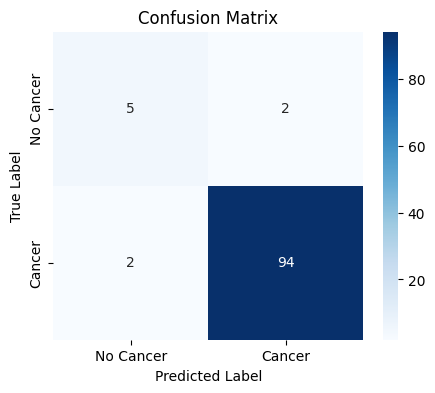

In [56]:
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Final Model

In [57]:
Y_pred = knn_classify(X_train, Y_train, X_test, 7)

In [58]:
# Classification Evaluation Metrics
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.970873786407767


In [59]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 6  1]
 [ 2 94]]


In [60]:
report = classification_report(Y_test, Y_pred)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.99      0.98      0.98        96

    accuracy                           0.97       103
   macro avg       0.87      0.92      0.89       103
weighted avg       0.97      0.97      0.97       103

